This notebook serves as a case study for New Yorker.

Maher Nadar.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

# Pricing

Our marketing manager was surveying the willingness to buy one of our fashion items at a certain price. They discovered the demand quantities, i.e. the number of people willing to buy, at various price levels. We have them below in two arrays. 

Assumptions: <br>

- we have endless enough supply to satisfy any demand --> no constraint on the total purchases of the items being sold by 'New Yorker'.
- the demand gathered by the marketing surveys are considered to be the upper bounds of the potential sales, because the 

In [119]:
pricing_df = pd.DataFrame(
    {
        "price": [100, 90, 70, 60, 40, 20, 10],
        "demand": [100, 120, 200, 300, 1200, 2000, 2800],
    }
)

In [120]:
pricing_df["revenue"] = pricing_df.eval(" price * demand ")

# Calculate the percentage change in quantity demanded
pricing_df["demand_change"] = pricing_df["demand"].pct_change() * 100

# Calculate the percentage change in price
pricing_df["price_change"] = pricing_df["price"].pct_change() * 100

# Calculate price elasticity
pricing_df["elasticity"] = pricing_df["demand_change"] / pricing_df["price_change"]

<Axes: xlabel='price', ylabel='demand'>

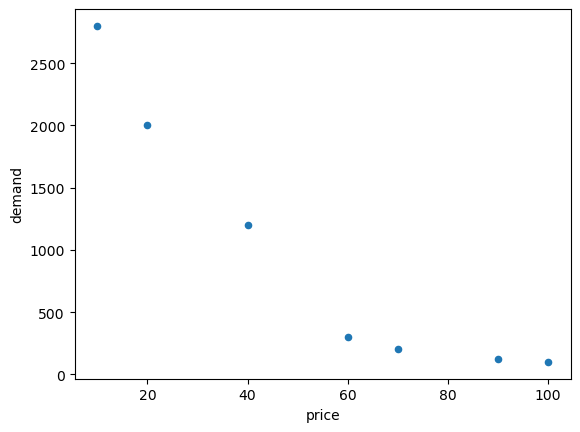

In [125]:
pricing_df.plot.scatter(x="price", y="demand")

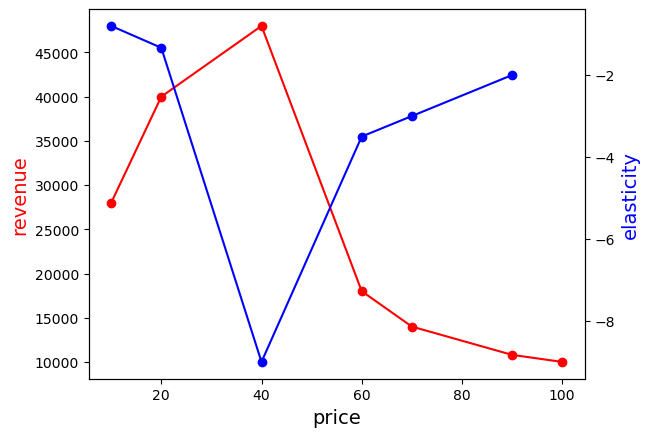

In [121]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(pricing_df["price"], pricing_df["revenue"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("price", fontsize=14)
# set y-axis label
ax.set_ylabel("revenue", color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pricing_df["price"], pricing_df["elasticity"], color="blue", marker="o")
ax2.set_ylabel("elasticity", color="blue", fontsize=14)
plt.show()
# save the plot as a file

In [122]:
# initial best price based on survey values:
pricing_df.query(" revenue == revenue.max() ").price.values[0]

40

In [123]:
pricing_df.query(" price == 40 ")

,price,demand,revenue,demand_change,price_change,elasticity
4,40,1200,48000,300.0,-33.333333,-9.0


In [131]:
def cost_calculation(demand):
	if demand <= 50:
		cost = 15
	elif 51 <= demand <= 100:
		cost = 12
	elif 101 <= demand <= 200:
		cost = 8
	elif demand > 200:
		cost = 4
	return cost

In [134]:
pricing_df['cost_per_unit'] = pricing_df.demand.apply(cost_calculation)
pricing_df

,price,demand,revenue,demand_change,price_change,elasticity,cost_per_unit
0,100,100,10000,NaN,NaN,NaN,12
1,90,120,10800,20.000000,-10.000000,-2.000000,8
2,70,200,14000,66.666667,-22.222222,-3.000000,8
3,60,300,18000,50.000000,-14.285714,-3.500000,4
4,40,1200,48000,300.000000,-33.333333,-9.000000,4
5,20,2000,40000,66.666667,-50.000000,-1.333333,4
6,10,2800,28000,40.000000,-50.000000,-0.800000,4


# Regression

In [ ]:
filename = "sales.csv"

sales_df = pd.read_csv(filename, index_col="date", parse_dates=["date"])

print(sales_df.shape)

print(sales_df.dtypes)

(103, 7)
Blouse     int64
Dress      int64
Hoodie     int64
Jacket     int64
Shorts     int64
Skirt      int64
T-shirt    int64
dtype: object


In [ ]:
sales_df["Total_Sales"] = sales_df.sum(axis=1)

In [ ]:
sales_df.head()

,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt,total_sales
date,,,,,,,,
2018-09-27,19194,21046,12573,10720,3309,9791,26523,103156.0
2018-10-04,13292,14721,6916,7645,2557,6981,17594,69706.0
2018-10-11,19954,20708,7495,9138,3632,9956,23666,94549.0
2018-10-18,17547,20016,7913,9693,3565,7894,20586,87214.0
2018-10-25,17420,20397,8887,12132,3415,7495,19395,89141.0


<Axes: xlabel='date'>

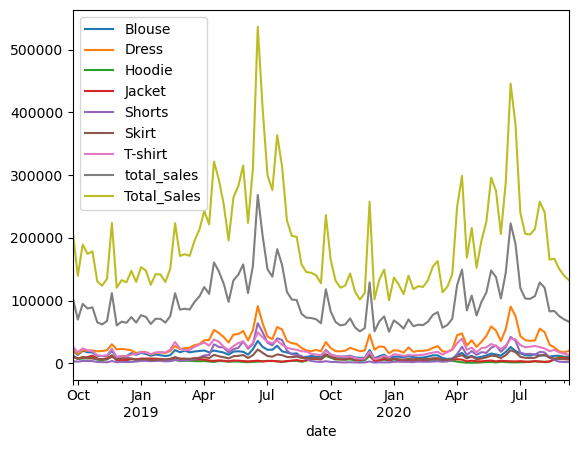

In [ ]:
sales_df.plot()